In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
!pip install seaborn as sns -q # visualization with seaborn v0.11.1
import seaborn as sns # visualization
import missingno as msno # missing values pattern visualization

import warnings # supress warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import math


plt.style.use('bmh')

# set pandas display option
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Load the data 
Books_df = pd.read_csv('archive/Books.csv')
Ratings_df = pd.read_csv('archive/Ratings.csv')
Users_df = pd.read_csv('archive/Users.csv')

/home/parth/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/parth/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
# display the dataset
Ratings_df.head().style.set_caption('Sample of Ratings data')

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Summarize the dataset

In [4]:
# dimension of dataset
print(f'''\t  Book_df shape is {Books_df.shape}
          Ratings_df shape is {Ratings_df.shape}
          Users_df shape is {Users_df.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


In [5]:
def missing_zero_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    print(f"Your selected dataframe has "+str(df.shape[1])+" columns and "+str(df.shape[0])+" Rows.\n"
         "There are "+str(mz_table[mz_table.iloc[:,1] != 0].shape[0])+
          " columns that have missing values.")
    return mz_table.reset_index()

In [6]:
missing_zero_values_table(Users_df)

Your selected dataframe has 3 columns and 278858 Rows.
There are 1 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [7]:
missing_zero_values_table(Ratings_df)

Your selected dataframe has 3 columns and 1149780 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


In [8]:
missing_zero_values_table(Books_df)

Your selected dataframe has 8 columns and 271360 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,1,0.0,object
3,Year-Of-Publication,0,0.0,object
4,Publisher,2,0.0,object
5,Image-URL-S,0,0.0,object
6,Image-URL-M,0,0.0,object
7,Image-URL-L,3,0.0,object


Check outlier data in **Age** and **Book-Rating** column  

Text(0.5, 1.0, 'Find outlier data in Age column')

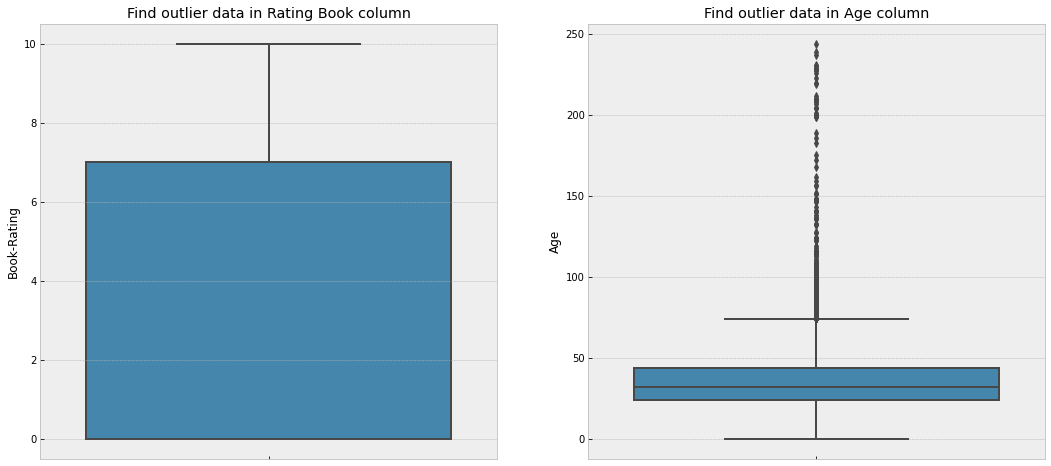

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(y='Book-Rating', data=Ratings_df,ax=ax[0])
ax[0].set_title('Find outlier data in Rating Book column')
sns.boxplot(y='Age', data=Users_df,ax=ax[1])
ax[1].set_title('Find outlier data in Age column')

In [10]:
print(sorted(Users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age : 244 :))

Ok we have Outlier data in Age    
so must be fixed it   

OK let's find our unique value in Location column 

In [11]:
Users_df.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [12]:
len(Users_df.Location.unique())

57339

57339 unique Value it's really hard to understand  
so use regex and create column country

In [13]:
Books_df['Book-Author'].describe()

count              271359
unique             102023
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

Say us Miss [Agatha Christie](https://www.biography.com/writer/agatha-christie) is top in Books data frame

In [14]:
print(Books_df['Year-Of-Publication'].unique().tolist())

[2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994, 2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980, 1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974, 1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004', '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993', '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996', '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988', '1963', '1956', '1970', '1985', '1978', '1973', '1980', '1979', '1975', '1969', '1961', '1965', '1939', '1958', '1950', '1953', '1966', '1971', '1959',

Year of publication **2037** !!  
'**Gallimard**' , '**DK Publishing Inc**' , type of sum year is **string**  

In [15]:
1.0 - (np.count_nonzero(Ratings_df)/float(Ratings_df.size))

0.20760754231244238

15 percent sparse

In [16]:
sorted(Ratings_df['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

0 is an invalid number in the rated books  
and rating value must be 1 to 10

In [17]:
Ratings_df.shape[0]

1149780

In [18]:
usersCount=Users_df.shape[0]
booksCount=Books_df.shape[0]
print(f'Users : {usersCount}')
print(f'Books : {booksCount}')
print(f'Total : {usersCount*booksCount}')

Users : 278858
Books : 271360
Total : 75670906880


Users rated **1149780** books, but there are **271360** books        
so users did not rate all books      
and users participation that rated make two question   
1. Are the books they rated part of the book's data frame ?  
2. Are the users they rated part of the user's data frame ?  



In [19]:
ratings_new = Ratings_df[Ratings_df.ISBN.isin(Books_df.ISBN)]
ratings_new = ratings_new[Ratings_df['User-ID'].isin(Users_df['User-ID'])]

In [20]:
print("Users or books aren't in dataset")
print(f'Total : {Ratings_df.shape[0] - ratings_new.shape[0]}')

Users or books aren't in dataset
Total : 118644


In [21]:
sparsity = round(1.0 - len(ratings_new)/float(usersCount*booksCount),6)
sparsity

0.999986

Age column has 39 percent null data   
and age column has outlier data   
and I can don't use Cosine Similarity   
so let's do it together  
if any things it's not correct I'm really become happy to tell me 

# Visualization and Modeling

**Steps**
1. rename columns names :))
2. Create country column to analyze better 
3. Fill Na value in  Country column 
4. Some data in Country Column has Misspellings 
5. Create rating_Avg and number_of_rating to analyze better
6. users more in which countries
7. Age column has outlier data 
8. Fill Na value in Age column 
9. Fill Na value in Book data frame's Author column 
10. Fill Na value in Book data frame's Publisher column 
11. Book data frame's Year of Publication column has two string value and some integer value  type is string
12. Book data frame's Year of Publication has outlier data 
13. Fill Na value in Book data frame's Year of Publication 
14. join three data frames together
15. Delete user and book columns they rated but aren't in the dataset
16. Rating_book value must be 1 to 10
17. drop three unhelpful columns 'Image-URL-S', 'Image-URL-M', 'Image-URL-L' 

In [22]:
Ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'book_rating'},inplace=True)
Users_df.rename(columns={'User-ID':'user_id'},inplace=True)
Books_df.rename(columns={'Book-Title':'Book_Title','Book-Author':'Book_Author',
                         'Year-Of-Publication':'Year_Of_Publication'},inplace=True)

**Country Column**

In [23]:
Users_df['Country']='Iran'
for i in Users_df:
    Users_df['Country']=Users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [24]:
len(Users_df.Country.unique())

530

In [25]:
Users_df.isnull().sum()

user_id          0
Location         0
Age         110762
Country        368
dtype: int64

368 of users Country column is Nan so must be fill it 

In [26]:
Users_df.loc[Users_df.Country.isnull(),'Country']='other'

So I don't have any idea Location column has 57339 unique value    
for this I use Regex and create country column   
but we have [195 Countries in the World !!](https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/)  
But it's better than 57339 unique Location value :))  


In [27]:
pd.crosstab(Users_df.Country,Ratings_df.book_rating).T.style.background_gradient()

Some data has Misspellings 

In [28]:
Users_df['Country'].replace(['','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Create Column 'count rate'   
user participation in rated   
and even users rated the books zero   

Rating Average and

In [29]:
# Create column Count_All_Rate
Ratings_df['Count_All_Rate']=Ratings_df.groupby('ISBN')['user_id'].transform('count')

**Country and Users**

In [30]:
cm=sns.light_palette('green',as_cmap=True)
popular=Users_df.Country.value_counts().to_frame()[:10]
popular.rename(columns={'Country':'Count_Users_Country'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Count_Users_Country
usa,139735
canada,21659
united kingdom,18557
germany,17074
spain,13258
australia,12935
italy,11282
other,4956
france,3487
portugal,3390


In the below chart there is one row has named 'other' it's mean    
location is Nan, or regex it's not able to read

**Age Columns**

In the plot and in the unique value   
we understand we have outlier data   
so for outlier data I convert it to Nan value  

In [31]:
# outlier data became NaN
Users_df.loc[(Users_df.Age > 100 ) | (Users_df.Age < 5),'Age']=np.nan

<AxesSubplot:ylabel='Frequency'>

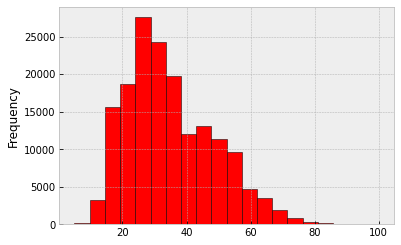

In [32]:
Users_df.Age.plot.hist(bins=20,edgecolor='black',color='red')

In [33]:
round(Users_df.Age.skew(axis=0,skipna=True),3)

0.675

Age has **positive Skewness** (right tail)      
so we I have one idea to fill Na value from **Median**   
for this we don't like to fill Na value **just for one range of age** for handle it I use **country column** to fill Na 

In [34]:
# Series of users data live in which country 
countryUsers = Users_df.Country.value_counts()

In [35]:
country=countryUsers[countryUsers>=5].index.tolist()

In [36]:
# Range of Age users in country register in this library and had participation
RangeOfAge = Users_df.loc[Users_df.Country.isin(country)][['Country','Age']].groupby('Country').agg(np.mean).to_dict()

In [37]:

for k,v in RangeOfAge['Age'].items():
    Users_df.loc[(Users_df.Age.isnull())&(Users_df.Country== k),'Age'] = v
    

In [38]:
Users_df.isnull().sum()

user_id       0
Location      0
Age         330
Country       0
dtype: int64

POF again we have 330 null Value   
for fill in it   
Age has **positive Skewness** (right tail)        
so we I have one idea to fill Na value from **Median**     

In [39]:
medianAge = int(Users_df.Age.median())
Users_df.loc[Users_df.Age.isnull(),'Age']=medianAge

In [40]:
Users_df.isnull().sum()

user_id     0
Location    0
Age         0
Country     0
dtype: int64

**Book Author** column has **Nan** value

In [41]:
Books_df[Books_df.Book_Author.isnull()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [42]:
Books_df.loc[(Books_df.ISBN=='9627982032'),'Book_Author']='other'

**Publisher column has Nan value**

In [43]:
Books_df[Books_df.Publisher.isnull()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [44]:
Books_df.loc[(Books_df.ISBN=='193169656X'),'Publisher']='other'
Books_df.loc[(Books_df.ISBN=='1931696993'),'Publisher']='other'

**Year of Publication**

In [45]:
Books_df[Books_df.Year_Of_Publication=='Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [46]:
Books_df[Books_df.Year_Of_Publication=='DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [47]:
Books_df.loc[Books_df.ISBN=='2070426769','Year_Of_Publication']=2003
Books_df.loc[Books_df.ISBN=='2070426769','Book_Author']='Gallimard'

In [48]:
Books_df.loc[Books_df.ISBN=='0789466953','Year_Of_Publication']=2000
Books_df.loc[Books_df.ISBN=='0789466953','Book_Author']='DK Publishing Inc'
Books_df.loc[Books_df.ISBN=='078946697X','Year_Of_Publication']=2000
Books_df.loc[Books_df.ISBN=='078946697X','Book_Author']='DK Publishing Inc'

In [49]:
Books_df.Year_Of_Publication=Books_df.Year_Of_Publication.astype(np.int32)

In [50]:
print(sorted(Books_df.Year_Of_Publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Years of publication after 2021 and 0 it's not normal   
so must be converted to Nan value

In [51]:
Books_df.loc[(Books_df.Year_Of_Publication>=2021)|(Books_df.Year_Of_Publication==0),'Year_Of_Publication']=np.NAN

In [52]:
Books_df.isnull().sum()

ISBN                      0
Book_Title                0
Book_Author               0
Year_Of_Publication    4632
Publisher                 0
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

In [53]:
author=Books_df[Books_df.Year_Of_Publication.isnull()].Book_Author.unique().tolist()

In [54]:
RangeYearOfPublication = Books_df.loc[Books_df.Book_Author.isin(author)][['Book_Author','Year_Of_Publication']].groupby('Book_Author').agg(np.mean).round(0).to_dict()

In [55]:
meanYear=round(Books_df.Year_Of_Publication.mean())
authorNanYear={}
authorYear={}
for k,v in RangeYearOfPublication['Year_Of_Publication'].items():
    if math.isnan(v) != True:
        authorYear[k]=v
    else:
        authorNanYear[k] = meanYear

In [56]:
len(authorNanYear.keys())

1355

1355 authors don't have a year of publication and the average of them is Nan   
and I forced filling Nan value with mean of all year of publication authors

In [57]:
len(authorYear.keys())

1959

In [58]:
# for k,v in authorYear.items():
#     Books_df.loc[(Books_df.Year_Of_Publication.isnull())&(Books_df.Book_Author== k),'Year_Of_Publication'] = v

1959 authors don't have year of publication of them books    
and they return value   
but it's take long time to fill Nan value   
I would like to find a fast way :))  
but now I don't know   
if you know please tell me in the comment  

This method it's not helpful     
I must find another way      

In [59]:
Books_df.loc[Books_df.Year_Of_Publication.isnull(),'Year_Of_Publication'] = round(Books_df.Year_Of_Publication.mean())

I don't like this method, but I force to use this solution

**new Ratings_book dataset**

In [60]:
ratings_new = Ratings_df[Ratings_df.ISBN.isin(Books_df.ISBN)]
ratings_new = ratings_new[ratings_new.user_id.isin(Users_df.user_id)]

Separate 1 to 10 and 0 rated value

In [61]:
ratings_0 = ratings_new[ratings_new.book_rating ==0]
ratings_1to10 = ratings_new[ratings_new.book_rating !=0]
# Create column Rating average 
ratings_1to10['rating_Avg']=ratings_1to10.groupby('ISBN')['book_rating'].transform('mean')
# Create column Rating sum
ratings_1to10['rating_sum']=ratings_1to10.groupby('ISBN')['book_rating'].transform('sum')

In [62]:
ratings_0.shape[0]

647294

In [63]:
ratings_1to10.shape[0]

383842

In [64]:
ratings_1to10.head()

,user_id,ISBN,book_rating,Count_All_Rate,rating_Avg,rating_sum
1,276726,0155061224,5,2,5.000000,5
3,276729,052165615X,3,1,3.000000,3
4,276729,0521795028,6,1,6.000000,6
8,276744,038550120X,7,184,7.580247,614
16,276747,0060517794,9,66,8.000000,240


In [65]:
dataset=Users_df.copy()
dataset=pd.merge(dataset,ratings_1to10,on='user_id')
dataset=pd.merge(dataset,Books_df,on='ISBN')

In [66]:
def skew_test(df):
    col = df.skew(axis = 0, skipna = True)
    val = df.skew(axis = 0, skipna = True) 
    sk_table = pd.concat([col, val], axis = 1)
    sk_table = sk_table.rename(
    columns = {0 : 'skewness'})
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(sk_table.shape[0]) +
          " columns that have skewed values - Non Gaussian distribution.")
    return sk_table.drop([1], axis = 1).sort_values('skewness',ascending = False).reset_index()

In [67]:
skk = skew_test(dataset)
skk.style.background_gradient(cmap='Blues')

Your selected dataframe has 16 columns and 383842 Rows.
There are 7 columns that have skewed values - Non Gaussian distribution.


,index,skewness
0,Count_All_Rate,8.755342
1,rating_sum,5.974328
2,Age,0.628378
3,user_id,0.045419
4,book_rating,-0.661295
5,rating_Avg,-0.811042
6,Year_Of_Publication,-5.096793


<AxesSubplot:xlabel='book_rating', ylabel='count'>

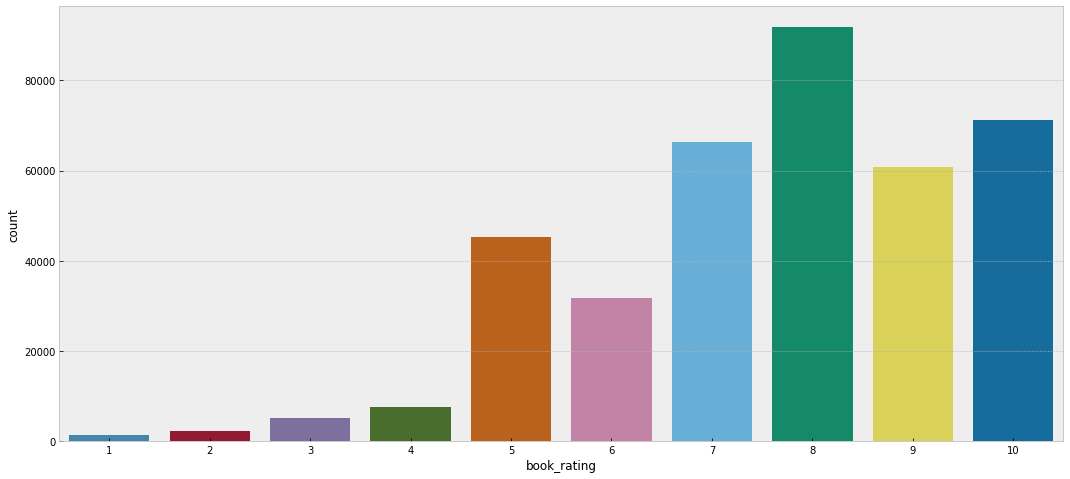

In [68]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(data=ratings_1to10,x='book_rating',ax=ax)

In [69]:
print(dataset.columns.tolist())

['user_id', 'Location', 'Age', 'Country', 'ISBN', 'book_rating', 'Count_All_Rate', 'rating_Avg', 'rating_sum', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


We don't need 3 columns : 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'

In [70]:
dataset=dataset[['user_id', 'Location', 'Age', 'Country', 'ISBN', 'book_rating', 'rating_Avg','rating_sum', 'Count_All_Rate', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher']]

In [71]:
missing_zero_values_table(dataset)

Your selected dataframe has 13 columns and 383842 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,user_id,0,0.0,int64
1,Location,0,0.0,object
2,Age,0,0.0,float64
3,Country,0,0.0,object
4,ISBN,0,0.0,object
5,book_rating,0,0.0,int64
6,rating_Avg,0,0.0,float64
7,rating_sum,0,0.0,int64
8,Count_All_Rate,0,0.0,int64
9,Book_Title,0,0.0,object


In [72]:
dataset.head()

,user_id,Location,Age,Country,ISBN,book_rating,rating_Avg,rating_sum,Count_All_Rate,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,8,"timmins, ontario, canada",35.311347,canada,0002005018,5,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",34.241348,other,0002005018,8,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30.000000,canada,0002005018,8,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,"ottawa, ,",34.241348,other,0002005018,9,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",35.311347,canada,0002005018,9,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [73]:
dataset.to_csv('final_data.csv',index = False)

Ok everything's ok  

# Implementation of Bandits

I don't have great knowledge, but I try to create best :))

<hr>